<head>
    <br>
    <h1 style="text-align:center"><Strong>Probability of failure of public transport system with distributions</strong></h1>
    <h3 style="text-align:center"> Ing. Alejandro Silva Ramírez</h3>
    <br><br><br>
    <p style="text-align:center;font-size:13px">In this project, a case study of a passenger transport system during peak hours is evaluated, as well as the capacity of buses to fully transport them. In this case, exist two types of Buses, Articulated and Biarticulated, and we want to know how to distribute them by their availability to transport passengers in the best way. This data is estimated from the frequency of bus dispatch, the total occupancy of each bus and the passenger demand. The data is obtained from various probability dispersion functions obtained from the measurement of the service during 1 year. </p>
    <br><br>
</head>

In [2]:
from scipy import stats
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Distributions
#### The Distributions of each value came from these data:
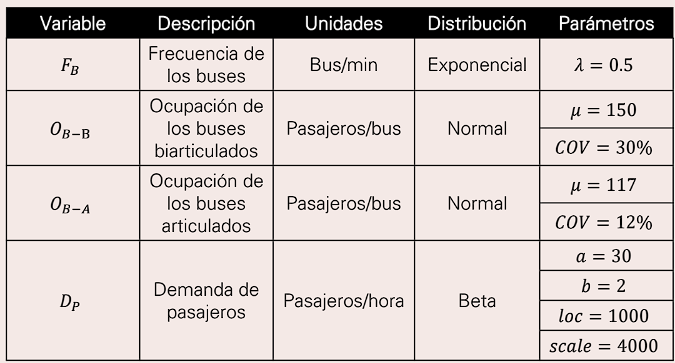
<br>
#### Where:
>#### Fb = Bus Frequency
>#### Ob-b = Biarticulated Bus occupation
>#### Ob-a = Articulated Bus occupation
>#### Dp = Passenger demand

<br>

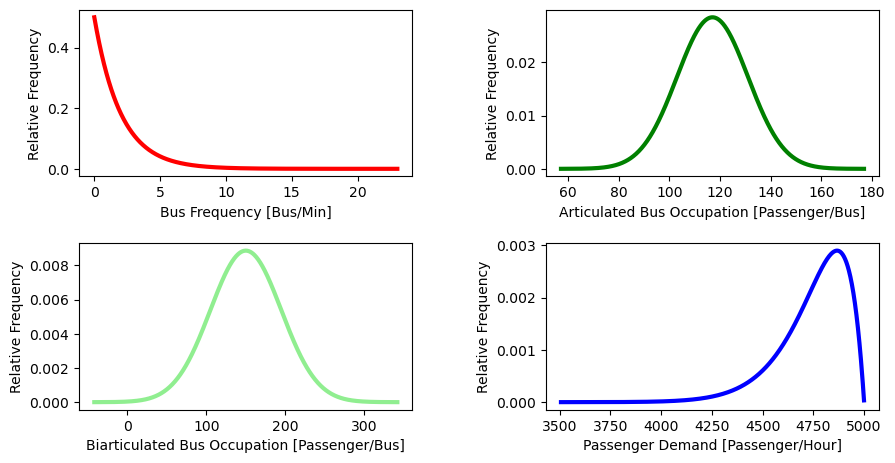

In [4]:
# Bus Frequency:
Frec_lambda = 0.5
Frec_scale = 1/Frec_lambda
dist_Frec = stats.expon(scale = Frec_scale)

# Biarticulated Bus occupation:
Bi_mu = 150
Bi_cov = 0.3
Bi_sigma = Bi_cov * Bi_mu
dist_Bi = stats.norm(loc = Bi_mu, scale = Bi_sigma)

# Articulated Bus occupation:
Ar_mu = 117
Ar_cov = 0.12
Ar_sigma = Ar_cov * Ar_mu
dist_Ar = stats.norm(loc = Ar_mu, scale = Ar_sigma)

# Passenger demand:
Pas_a = 30
Pas_b = 2
Pas_loc = 1000
Pas_scale = 4000
dist_Pas = stats.beta(a = Pas_a, b = Pas_b, loc = Pas_loc, scale = Pas_scale)

# Plot
plt.rcParams["figure.figsize"] = (10,5)

Frec_x = np.linspace(dist_Frec.ppf(0.00001), dist_Frec.ppf(0.99999), 1000)
Bi_x = np.linspace(dist_Bi.ppf(0.00001), dist_Bi.ppf(0.99999), 1000)
Ar_x = np.linspace(dist_Ar.ppf(0.00001), dist_Ar.ppf(0.99999), 1000)
Pas_x = np.linspace(dist_Pas.ppf(0.00001), dist_Pas.ppf(0.99999), 1000)

plt.subplot(221)
plt.plot(Frec_x, dist_Frec.pdf(Frec_x), color='r', linewidth = 3)
plt.xlabel("Bus Frequency [Bus/Min]")
plt.ylabel("Relative Frequency")
plt.subplot(222)
plt.plot(Ar_x, dist_Ar.pdf(Ar_x), color='green', linewidth = 3)
plt.xlabel("Articulated Bus Occupation [Passenger/Bus]")
plt.ylabel("Relative Frequency")
plt.subplot(223)
plt.plot(Bi_x, dist_Bi.pdf(Bi_x), color='lightgreen', linewidth = 3)
plt.xlabel("Biarticulated Bus Occupation [Passenger/Bus]")
plt.ylabel("Relative Frequency")
plt.subplot(224)
plt.plot(Pas_x, dist_Pas.pdf(Pas_x), color='b', linewidth = 3)
plt.xlabel("Passenger Demand [Passenger/Hour]")
plt.ylabel("Relative Frequency")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()

# Montecarlo
#### To obtain the probability distribution of the complete system, we will use a mathematical technique called the Montecarlo distribution.
<br>

#### First, lets generate random values.

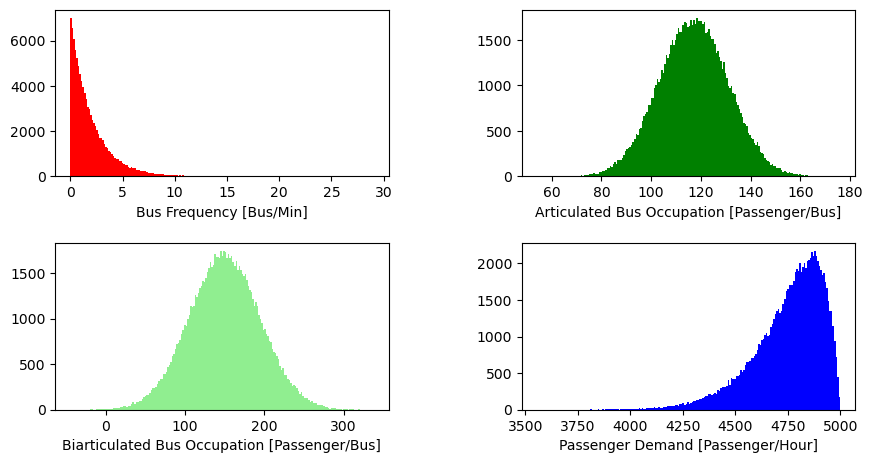

In [6]:
N = 100000

# Generate Random Values:
valores_Frec = stats.expon.rvs(scale = Frec_scale, size = N) # [Bus/Min]
valores_Ar = stats.norm.rvs(loc = Ar_mu, scale = Ar_sigma, size = N) # [Passenger/Bus]
valores_Bi = stats.norm.rvs(loc = Bi_mu, scale = Bi_sigma, size = N) # [Passenger/Bus]
valores_Pas = stats.beta.rvs(a = Pas_a, b = Pas_b, loc = Pas_loc, scale = Pas_scale, size = N) # [Passenger/Hour]

# Plot Values Generated:
plt.subplot(221)
plt.hist(valores_Frec, bins=200, color = "r")
plt.xlabel("Bus Frequency [Bus/Min]")
plt.subplot(222)
plt.hist(valores_Ar, bins=200, color = "green")
plt.xlabel("Articulated Bus Occupation [Passenger/Bus]")
plt.subplot(223)
plt.hist(valores_Bi, bins=200, color = "lightgreen")
plt.xlabel("Biarticulated Bus Occupation [Passenger/Bus]")
plt.subplot(224)
plt.hist(valores_Pas, bins=200, color = "b")
plt.xlabel("Passenger Demand [Passenger/Hour]")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()

#### Now, use these functions to get the total Capacity of each Bus:

>- #### Biarticulated Capacity [Passenger/Hour]  =  (Bus Frequency) * (Biarticulated Occupation) * 60

>- #### Articulated Capacity [Passenger/Hour] = (Bus Frequency) * (Articulated Occupation) * 60

>- #### Challenge = Passenger Demand
<br>

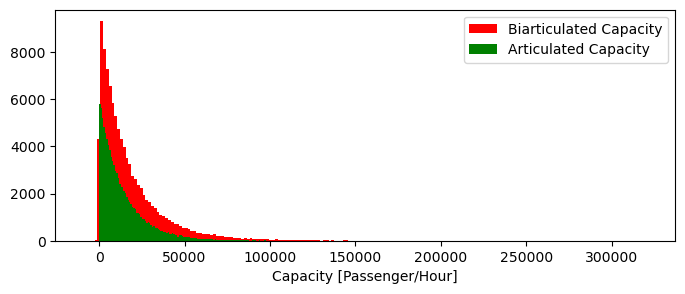

In [8]:
# Capacity of each System in [Passenger/Hour]
valores_FrecAr = valores_Frec * valores_Ar * 60
valores_FrecBi = valores_Frec * valores_Bi * 60

# Plot Values Generated:
plt.rcParams["figure.figsize"] = (8,3)

plt.hist(valores_FrecBi, bins=200, color = "r", label = "Biarticulated Capacity")
plt.hist(valores_FrecAr, bins=200, color = "green", label = "Articulated Capacity")
plt.xlabel("Capacity [Passenger/Hour]")
plt.legend()
plt.show()

#### A safety limit of 6,000 passengers is considered to define that the system does not meet demand.

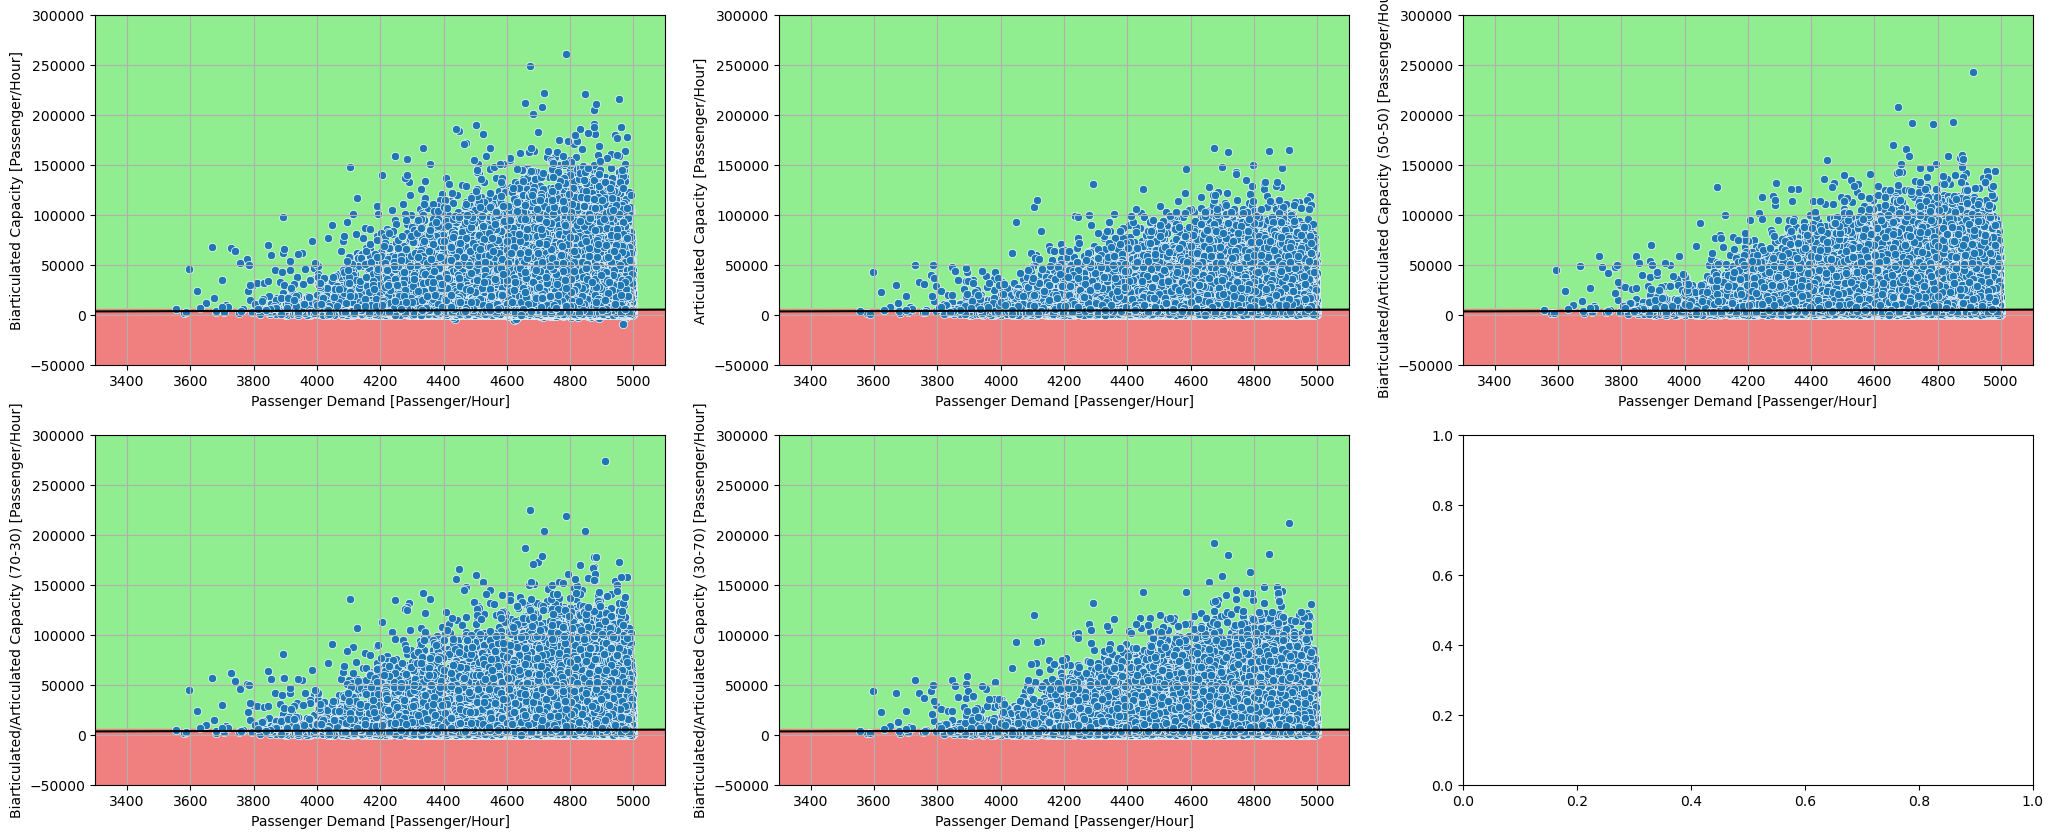

In [10]:
# Plots values:
limit = 6000
xmin, xmax, ymin, ymax = 3300, 5100, -50000, 300000
linemin, linemax = 0, limit

# Three different Cases to dispatch:
valores_FrecBiAr_50_50 = valores_FrecBi*0.5 + valores_FrecAr*0.5
valores_FrecBiAr_70_30 = valores_FrecBi*0.7 + valores_FrecAr*0.3
valores_FrecBiAr_30_70 = valores_FrecBi*0.3 + valores_FrecAr*0.7

f, axes = plt.subplots(2, 3, figsize=(25,10))

axes[0,0].set(xlim = (xmin, xmax), ylim = (ymin, ymax), xlabel="Passenger Demand [Passenger/Hour]", ylabel="Biarticulated Capacity [Passenger/Hour]")
axes[0,1].set(xlim = (xmin, xmax), ylim = (ymin, ymax), xlabel="Passenger Demand [Passenger/Hour]", ylabel="Articulated Capacity [Passenger/Hour]")
axes[0,2].set(xlim = (xmin, xmax), ylim = (ymin, ymax), xlabel="Passenger Demand [Passenger/Hour]", ylabel="Biarticulated/Articulated Capacity (50-50) [Passenger/Hour]")
axes[1,0].set(xlim = (xmin, xmax), ylim = (ymin, ymax), xlabel="Passenger Demand [Passenger/Hour]", ylabel="Biarticulated/Articulated Capacity (70-30) [Passenger/Hour]")
axes[1,1].set(xlim = (xmin, xmax), ylim = (ymin, ymax), xlabel="Passenger Demand [Passenger/Hour]", ylabel="Biarticulated/Articulated Capacity (30-70) [Passenger/Hour]")

sns.scatterplot(ax=axes[0,0], x = valores_Pas, y = valores_FrecBi)
sns.scatterplot(ax=axes[0,1], x = valores_Pas, y = valores_FrecAr)
sns.scatterplot(ax=axes[0,2], x = valores_Pas, y = valores_FrecBiAr_50_50)
sns.scatterplot(ax=axes[1,0], x = valores_Pas, y = valores_FrecBiAr_70_30)
sns.scatterplot(ax=axes[1,1], x = valores_Pas, y = valores_FrecBiAr_30_70)

# Limit Line:
axes[0,0].plot([linemin, linemax], [linemin, linemax], "k")
axes[0,1].plot([linemin, linemax], [linemin, linemax], "k")
axes[0,2].plot([linemin, linemax], [linemin, linemax], "k")
axes[1,0].plot([linemin, linemax], [linemin, linemax], "k")
axes[1,1].plot([linemin, linemax], [linemin, linemax], "k")

# Green Area:
axes[0,0].fill_between(x = [xmin, xmax], y1 = [linemax, linemax], y2 = [ymax, ymax], color = "lightgreen", zorder = 0)
axes[0,1].fill_between(x = [xmin, xmax], y1 = [linemax, linemax], y2 = [ymax, ymax], color = "lightgreen", zorder = 0)
axes[0,2].fill_between(x = [xmin, xmax], y1 = [linemax, linemax], y2 = [ymax, ymax], color = "lightgreen", zorder = 0)
axes[1,0].fill_between(x = [xmin, xmax], y1 = [linemax, linemax], y2 = [ymax, ymax], color = "lightgreen", zorder = 0)
axes[1,1].fill_between(x = [xmin, xmax], y1 = [linemax, linemax], y2 = [ymax, ymax], color = "lightgreen", zorder = 0)

# Red Area:
axes[0,0].fill_between(x = [xmin, xmax], y1 = [ymin, ymin], y2 = [linemax, linemax], color = "lightcoral", zorder = 0)
axes[0,1].fill_between(x = [xmin, xmax], y1 = [ymin, ymin], y2 = [linemax, linemax], color = "lightcoral", zorder = 0)
axes[0,2].fill_between(x = [xmin, xmax], y1 = [ymin, ymin], y2 = [linemax, linemax], color = "lightcoral", zorder = 0)
axes[1,0].fill_between(x = [xmin, xmax], y1 = [ymin, ymin], y2 = [linemax, linemax], color = "lightcoral", zorder = 0)
axes[1,1].fill_between(x = [xmin, xmax], y1 = [ymin, ymin], y2 = [linemax, linemax], color = "lightcoral", zorder = 0)

axes[0,0].grid()
axes[0,1].grid()
axes[0,2].grid()
axes[1,0].grid()
axes[1,1].grid()

# Probabilities Graph

#### The system fails when the system capacity cannot meet passenger demand for at least 6,000 free spaces or more.
<br>

$$F = \{g(x) \le 6000\}$$
$$g(x) = C - D$$
$$g(x) = Bus Capacity - Passenger Demand$$
<br>

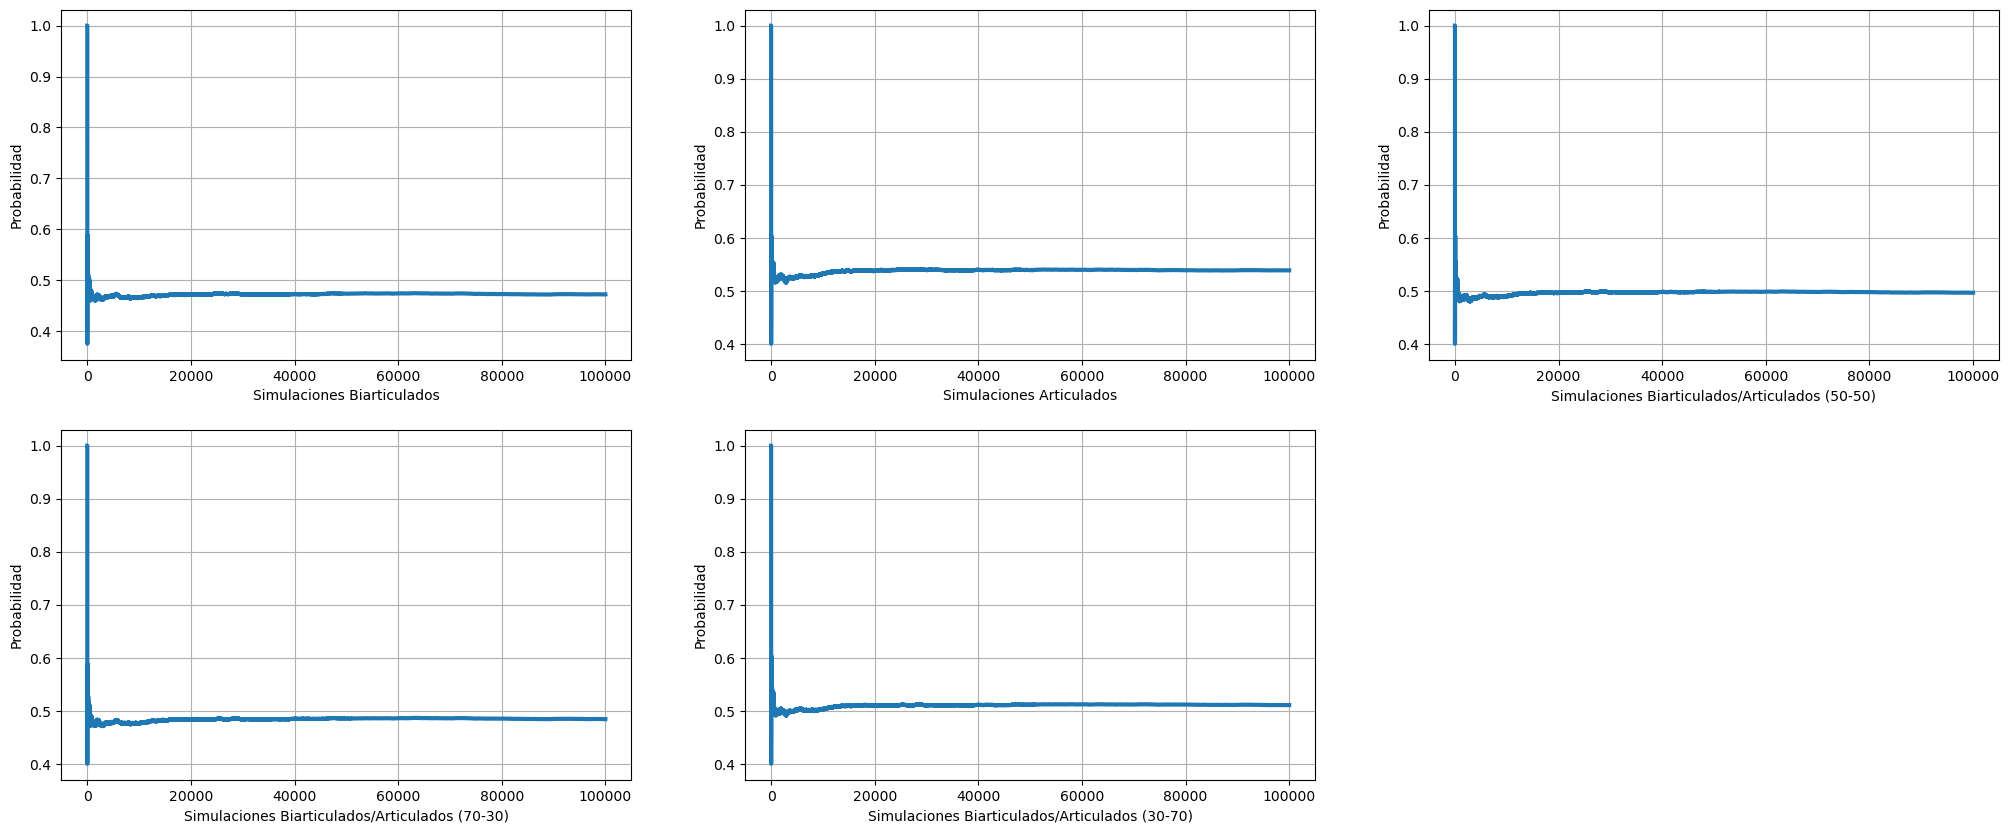

In [12]:
# Initialize counters and Vectors for Probabilities:
cont_Bi, cont_Ar, cont_BiAr_50_50, cont_BiAr_70_30, cont_BiAr_30_70 = 0, 0, 0, 0, 0
prob_Bi, prob_Ar, prob_BiAr_50_50, prob_BiAr_70_30, prob_BiAr_30_70 = [], [], [], [], []

for i in range(N):
  if(valores_FrecBi[i] - valores_Pas[i]) <= limit:
    cont_Bi += 1
  prob_Bi.append(cont_Bi/(i+1))

  if(valores_FrecAr[i] - valores_Pas[i]) <= limit:
    cont_Ar += 1
  prob_Ar.append(cont_Ar/(i+1))

  if(valores_FrecBiAr_50_50[i] - valores_Pas[i]) <= limit:
    cont_BiAr_50_50 += 1
  prob_BiAr_50_50.append(cont_BiAr_50_50/(i+1))

  if(valores_FrecBiAr_70_30[i] - valores_Pas[i]) <= limit:
    cont_BiAr_70_30 += 1
  prob_BiAr_70_30.append(cont_BiAr_70_30/(i+1))

  if(valores_FrecBiAr_30_70[i] - valores_Pas[i]) <= limit:
    cont_BiAr_30_70 += 1
  prob_BiAr_30_70.append(cont_BiAr_30_70/(i+1))


# Plot
plt.rcParams["figure.figsize"] = (25, 10)

plt.subplot(231)
plt.plot(np.linspace(1, N, N), prob_Bi, lw = 3)
plt.xlabel("Simulaciones Biarticulados")
plt.ylabel("Probabilidad")
plt.grid()

plt.subplot(232)
plt.plot(np.linspace(1, N, N), prob_Ar, lw = 3)
plt.xlabel("Simulaciones Articulados")
plt.ylabel("Probabilidad")
plt.grid()

plt.subplot(233)
plt.plot(np.linspace(1, N, N), prob_BiAr_50_50, lw = 3)
plt.xlabel("Simulaciones Biarticulados/Articulados (50-50)")
plt.ylabel("Probabilidad")
plt.grid()

plt.subplot(234)
plt.plot(np.linspace(1, N, N), prob_BiAr_70_30, lw = 3)
plt.xlabel("Simulaciones Biarticulados/Articulados (70-30)")
plt.ylabel("Probabilidad")
plt.grid()

plt.subplot(235)
plt.plot(np.linspace(1, N, N), prob_BiAr_30_70, lw = 3)
plt.xlabel("Simulaciones Biarticulados/Articulados (30-70)")
plt.ylabel("Probabilidad")
plt.grid()

plt.show()

In [13]:
# Final Probabilities:
print(f"The probability failure for Articulated Bus Only is {prob_Ar[-1]:.6f} or {prob_Ar[-1]*100:.4f} %")
print(f"The probability failure for 30% Biarticulated and 70% Articulated is {prob_BiAr_30_70[-1]:.6f} or {prob_BiAr_30_70[-1]*100:.4f} %")
print(f"The probability failure for 50% Biarticulated and 50% Articulated is {prob_BiAr_50_50[-1]:.6f} or {prob_BiAr_50_50[-1]*100:.4f} %")
print(f"The probability failure for 70% Biarticulated and 30% Articulated is {prob_BiAr_70_30[-1]:.6f} or {prob_BiAr_70_30[-1]*100:.4f} %")
print(f"The probability failure for Biarticulated Bus Only is {prob_Bi[-1]:.6f} or {prob_Bi[-1]*100:.4f} %")

The probability failure for Articulated Bus Only is 0.538600 or 53.8600 %
The probability failure for 30% Biarticulated and 70% Articulated is 0.510800 or 51.0800 %
The probability failure for 50% Biarticulated and 50% Articulated is 0.496350 or 49.6350 %
The probability failure for 70% Biarticulated and 30% Articulated is 0.484360 or 48.4360 %
The probability failure for Biarticulated Bus Only is 0.472140 or 47.2140 %
